## Notebook Setup  
**Note:** If running on Google Colab, the notebook may automatically restart after reinstalling the correct NumPy version.

In [1]:
import os
import sys
import subprocess
from pathlib import Path

def is_kaggle():
    return "KAGGLE_URL_BASE" in os.environ or "KAGGLE_KERNEL_RUN_TYPE" in os.environ

def is_colab():
    try:
        import google.colab  # noqa
        return not is_kaggle()
    except ImportError:
        return False

def ensure_numpy_version(required_version="1.26.4"):
    import pkg_resources
    current_version = pkg_resources.get_distribution("numpy").version
    if current_version != required_version:
        print(f"Installing NumPy {required_version} (found {current_version})...")
        subprocess.check_call([
            sys.executable, "-m", "pip", "install",
            f"numpy=={required_version}", "--force-reinstall"
        ])
        print("NumPy version updated. Please restart the runtime.")
        os._exit(0)

def install_project_colab(token, repo_url, repo_dir):
    subprocess.check_call(["git", "clone", f"https://{token}@{repo_url}", repo_dir])
    subprocess.check_call(["pip", "install", repo_dir], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

def install_project_kaggle(token, repo_url):
    subprocess.check_call([
        "pip", "install", f"git+https://{token}@{repo_url}"
    ], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

def configure_environment():
    repo_url = "github.com/Blaku03/PitchAnalyzer_AI.git"
    repo_name = "PitchAnalyzer_AI"

    if is_kaggle():
        print("Running on Kaggle")
        from kaggle_secrets import UserSecretsClient
        token = UserSecretsClient().get_secret("git_token")
        install_project_kaggle(token, repo_url)
        video_path = Path("/kaggle/input/pitchtest/08fd33_4.mp4")
        output_path = f"{video_path.name}_annotated.mp4"

    elif is_colab():
        print("Running on Google Colab")
        from google.colab import userdata
        ensure_numpy_version()
        token = userdata.get("git_token")
        repo_dir = f"/content/{repo_name}"
        install_project_colab(token, repo_url, repo_dir)
        video_path = Path(repo_dir) / "sample_data" / "08fd33_4.mp4"
        output_path = Path(repo_dir) / "output_videos" / f"{video_path.name}_annotated.mp4"
        os.makedirs(output_path.parent, exist_ok=True)

    else:
        print("Running locally")
        ensure_numpy_version()
        get_ipython().run_line_magic("load_ext", "autoreload")
        get_ipython().run_line_magic("autoreload", "2")
        ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
        if ROOT not in sys.path:
            sys.path.insert(0, ROOT)
        video_path = Path("../sample_data/08fd33_4.mp4")
        output_path = f"../output_videos/{video_path.name}_annotated.mp4"
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

    return video_path, output_path

# Call this function in your notebook
video_path, output_path = configure_environment()

Running on Google Colab


<ipython-input-1-099437cecbf4>:7: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


## Import models

In [3]:
from utils.import_models import ModelImporter
field_model = ModelImporter().download_pitch_model()
players_model = ModelImporter().download_player_model()


  0%|          | 0.00/134M [00:00<?, ?B/s]
  1%|          | 1.00M/134M [00:00<00:45, 3.07MB/s]
  3%|▎         | 4.00M/134M [00:00<00:12, 10.9MB/s]
  8%|▊         | 11.0M/134M [00:00<00:04, 28.1MB/s]
 13%|█▎        | 18.0M/134M [00:00<00:03, 40.2MB/s]
 19%|█▊        | 25.0M/134M [00:00<00:02, 49.1MB/s]
 23%|██▎       | 31.0M/134M [00:00<00:02, 53.0MB/s]
 29%|██▉       | 39.0M/134M [00:00<00:01, 58.9MB/s]
 34%|███▍      | 46.0M/134M [00:01<00:01, 61.1MB/s]
 40%|███▉      | 53.0M/134M [00:01<00:01, 62.0MB/s]
 45%|████▍     | 60.0M/134M [00:01<00:01, 61.1MB/s]
 50%|█████     | 67.0M/134M [00:01<00:01, 64.2MB/s]
 55%|█████▌    | 74.0M/134M [00:01<00:00, 65.4MB/s]
 61%|██████    | 81.0M/134M [00:01<00:00, 64.0MB/s]
 66%|██████▌   | 88.0M/134M [00:01<00:00, 62.8MB/s]
 72%|███████▏  | 96.0M/134M [00:01<00:00, 64.3MB/s]
 77%|███████▋  | 103M/134M [00:02<00:00, 62.9MB/s] 
 83%|████████▎ | 111M/134M [00:02<00:00, 64.1MB/s]
 88%|████████▊ | 118M/134M [00:02<00:00, 65.3MB/s]
 94%|█████████▎| 125M/

Model downloaded to /root/.cache/kagglehub/models/blaku03/player-detection/pyTorch/pitch_detection/1
Model file location at /root/.cache/kagglehub/models/blaku03/player-detection/pyTorch/pitch_detection/1/v1_0.pt



  0%|          | 0.00/109M [00:00<?, ?B/s]
  1%|          | 1.00M/109M [00:00<00:37, 3.06MB/s]
  4%|▎         | 4.00M/109M [00:00<00:10, 10.8MB/s]
 10%|█         | 11.0M/109M [00:00<00:03, 27.5MB/s]
 17%|█▋        | 19.0M/109M [00:00<00:02, 40.6MB/s]
 24%|██▍       | 26.0M/109M [00:00<00:01, 47.8MB/s]
 29%|██▉       | 32.0M/109M [00:00<00:01, 44.6MB/s]
 34%|███▍      | 37.0M/109M [00:01<00:01, 46.5MB/s]
 40%|████      | 44.0M/109M [00:01<00:01, 52.3MB/s]
 46%|████▌     | 50.0M/109M [00:01<00:01, 48.9MB/s]
 51%|█████▏    | 56.0M/109M [00:01<00:01, 51.8MB/s]
 59%|█████▊    | 64.0M/109M [00:01<00:00, 58.0MB/s]
 65%|██████▌   | 71.0M/109M [00:01<00:00, 60.4MB/s]
 71%|███████   | 77.0M/109M [00:01<00:00, 58.7MB/s]
 77%|███████▋  | 84.0M/109M [00:01<00:00, 62.1MB/s]
 84%|████████▍ | 92.0M/109M [00:02<00:00, 64.4MB/s]
 91%|█████████ | 99.0M/109M [00:02<00:00, 65.1MB/s]
100%|██████████| 109M/109M [00:02<00:00, 49.2MB/s]

Model downloaded to /root/.cache/kagglehub/models/blaku03/player-detection/pyTorch/player_detection/3
Model file location at /root/.cache/kagglehub/models/blaku03/player-detection/pyTorch/player_detection/3/v1_3.pt


## Demo of the field mapper


0: 544x960 1 pitch, 146.1ms
Speed: 15.0ms preprocess, 146.1ms inference, 487.9ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 1 pitch, 78.7ms
Speed: 10.3ms preprocess, 78.7ms inference, 3.0ms postprocess per image at shape (1, 3, 544, 960)


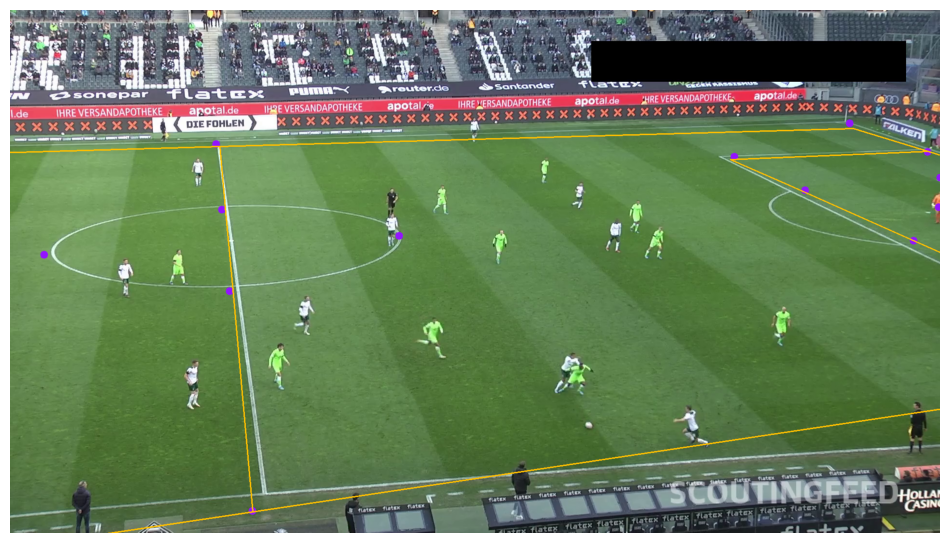

In [4]:
from utils.notebook_utils import show_image
from utils.video_utils import read_video
from trackers.pitch_tracker import PitchTracker
from annotators.pitch_annotator import PitchAnnotator

frame_generator = read_video(video_path)
first_frame = next(frame_generator)

pitch_tracker = PitchTracker(field_model)
pitch_keypoints, confidence_mask = pitch_tracker.get_pitch_keypoints(first_frame)
pitch_edges = pitch_tracker.get_pitch_edges(first_frame)

show_image(PitchAnnotator.annotate_frame(first_frame.copy(), (pitch_keypoints,pitch_edges)))


0: 544x960 1 pitch, 116.0ms
Speed: 12.9ms preprocess, 116.0ms inference, 8.3ms postprocess per image at shape (1, 3, 544, 960)


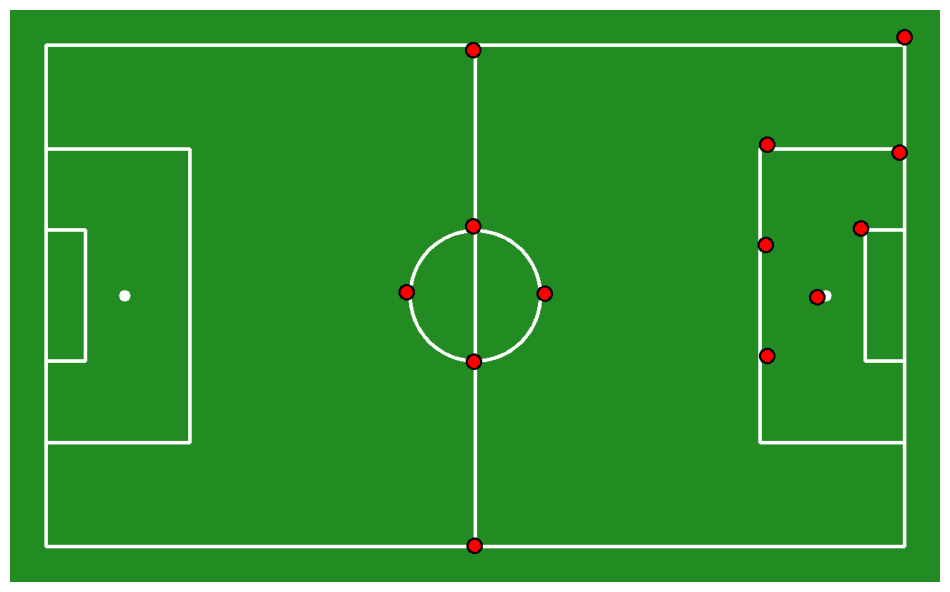

In [5]:
from utils.pitch_utils import draw_pitch, draw_points_on_pitch
from mapping_2d.soccer_field import SoccerPitchConfiguration
import supervision as sv

mapped_vert = pitch_tracker.map_points_2d(first_frame, pitch_keypoints.xy[0])

pitch_img = draw_pitch(SoccerPitchConfiguration())
pitch_img = draw_points_on_pitch(
    config=SoccerPitchConfiguration(),
    xy=mapped_vert.xy[0],
    face_color=sv.Color.BLUE,
    edge_color=sv.Color.BLACK,
    radius=10,
    pitch=pitch_img)

show_image(pitch_img)

## Draw detected players on the 2d plane


0: 736x1280 1 ball, 21 players, 3 referees, 130.4ms
1: 736x1280 1 ball, 20 players, 2 referees, 130.4ms
2: 736x1280 1 ball, 20 players, 3 referees, 130.4ms
3: 736x1280 1 ball, 20 players, 4 referees, 130.4ms
4: 736x1280 1 ball, 20 players, 3 referees, 130.4ms
5: 736x1280 1 ball, 1 goalkeeper, 20 players, 3 referees, 130.4ms
6: 736x1280 1 ball, 22 players, 3 referees, 130.4ms
7: 736x1280 21 players, 3 referees, 130.4ms
8: 736x1280 1 ball, 21 players, 4 referees, 130.4ms
9: 736x1280 1 ball, 21 players, 3 referees, 130.4ms
Speed: 11.0ms preprocess, 130.4ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 3 referees, 127.0ms
1: 736x1280 1 ball, 1 goalkeeper, 21 players, 3 referees, 127.0ms
2: 736x1280 1 ball, 1 goalkeeper, 20 players, 3 referees, 127.0ms
3: 736x1280 1 ball, 2 goalkeepers, 21 players, 3 referees, 127.0ms
4: 736x1280 1 ball, 1 goalkeeper, 20 players, 3 referees, 127.0ms
5: 736x1280 1 ball, 1 goalkeeper, 20 play

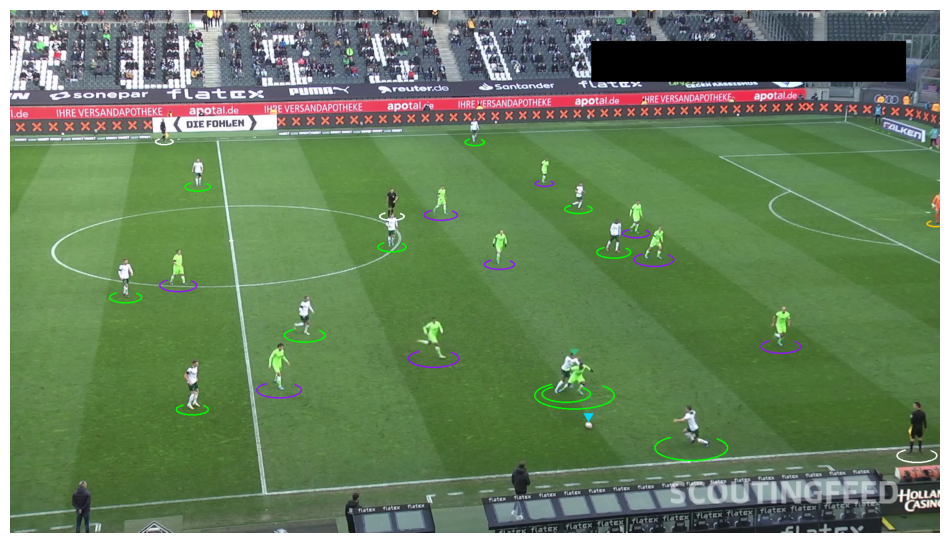

In [6]:
from annotators.game_entities_annotator import GameEntitiesAnnotator
from trackers.game_tracker import GameTracker

frame_generator = read_video(video_path)
tracks_generator =  GameTracker(players_model).get_detections_generator(frame_generator)

first_frame = next(frame_generator)
first_players_tracks = next(tracks_generator)

annotated_sample_image = GameEntitiesAnnotator.annotate_frame(first_frame.copy(), first_players_tracks)
show_image(annotated_sample_image)


0: 544x960 1 pitch, 63.5ms
Speed: 9.4ms preprocess, 63.5ms inference, 2.7ms postprocess per image at shape (1, 3, 544, 960)


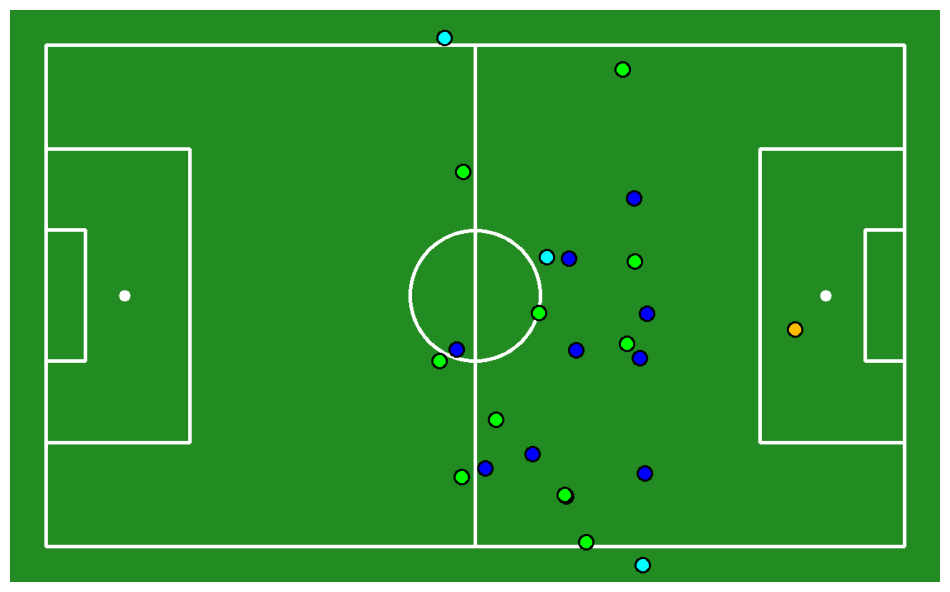

In [7]:
from annotators.pitch_2d_annotator import Pitch2DAnnotator

bottom_boxes = first_players_tracks.players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
mapped_2d_points = pitch_tracker.map_points_2d(first_frame, bottom_boxes)

show_image(Pitch2DAnnotator().annotate_frame(mapped_2d_points.xy[0], first_players_tracks))

In [8]:
# Annotate the full video
from utils.video_utils import save_video
import itertools

frame_generator = read_video(video_path)
frame_gen1, frame_gen2 = itertools.tee(frame_generator)

tracks_generator =  GameTracker(players_model).get_detections_generator(frame_gen1)
tracks_gen1, tracks_gen2 = itertools.tee(tracks_generator)

mapped_2d_points_generator = pitch_tracker.map_players_tracks_2d_generator(frame_gen2, tracks_gen1)
annotated_2d_field_generator = Pitch2DAnnotator().annotate_video(mapped_2d_points_generator, tracks_gen2)
save_video(annotated_2d_field_generator, output_path)


0: 736x1280 1 ball, 20 players, 4 referees, 129.9ms
1: 736x1280 1 ball, 1 goalkeeper, 20 players, 3 referees, 129.9ms
2: 736x1280 1 ball, 20 players, 4 referees, 129.9ms
3: 736x1280 2 balls, 20 players, 4 referees, 129.9ms
4: 736x1280 1 ball, 21 players, 3 referees, 129.9ms
5: 736x1280 1 ball, 20 players, 2 referees, 129.9ms
6: 736x1280 1 ball, 21 players, 5 referees, 129.9ms
7: 736x1280 1 goalkeeper, 20 players, 3 referees, 129.9ms
8: 736x1280 1 ball, 1 goalkeeper, 20 players, 3 referees, 129.9ms
9: 736x1280 1 ball, 21 players, 3 referees, 129.9ms
Speed: 16.3ms preprocess, 129.9ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 3 referees, 128.3ms
1: 736x1280 1 ball, 1 goalkeeper, 20 players, 3 referees, 128.3ms
2: 736x1280 1 ball, 1 goalkeeper, 21 players, 3 referees, 128.3ms
3: 736x1280 1 ball, 1 goalkeeper, 20 players, 3 referees, 128.3ms
4: 736x1280 1 ball, 2 goalkeepers, 21 players, 3 referees, 128.3ms
5: 736x1280 

750